In [1]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download mathchi/diabetes-data-set

  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 14.1MB/s]


In [3]:
!unzip -q diabetes-data-set.zip

In [4]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

df = pd.read_csv('/content/diabetes.csv')

In [20]:
x = df.iloc[:,0:8]
y = df.iloc[:,-1]

x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)

In [27]:
bestfeatures = SelectKBest(score_func=chi2, k=8)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(5,'Score'))

       Feature        Score
4      Insulin  2175.565273
1      Glucose  1411.887041
7          Age   181.303689
5          BMI   127.669343
0  Pregnancies   111.519691


[0.10959969 0.22894761 0.09819486 0.08206851 0.07523594 0.14342341
 0.11887166 0.14365832]


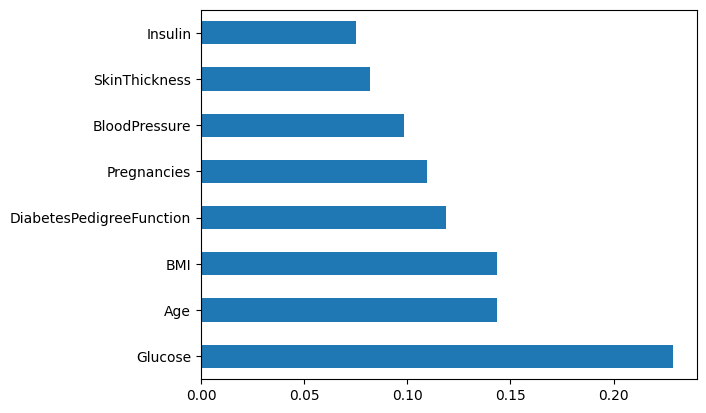

In [29]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(x,y)

print(model.feature_importances_)

feature_importances = pd.Series(model.feature_importances_, index=x.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()

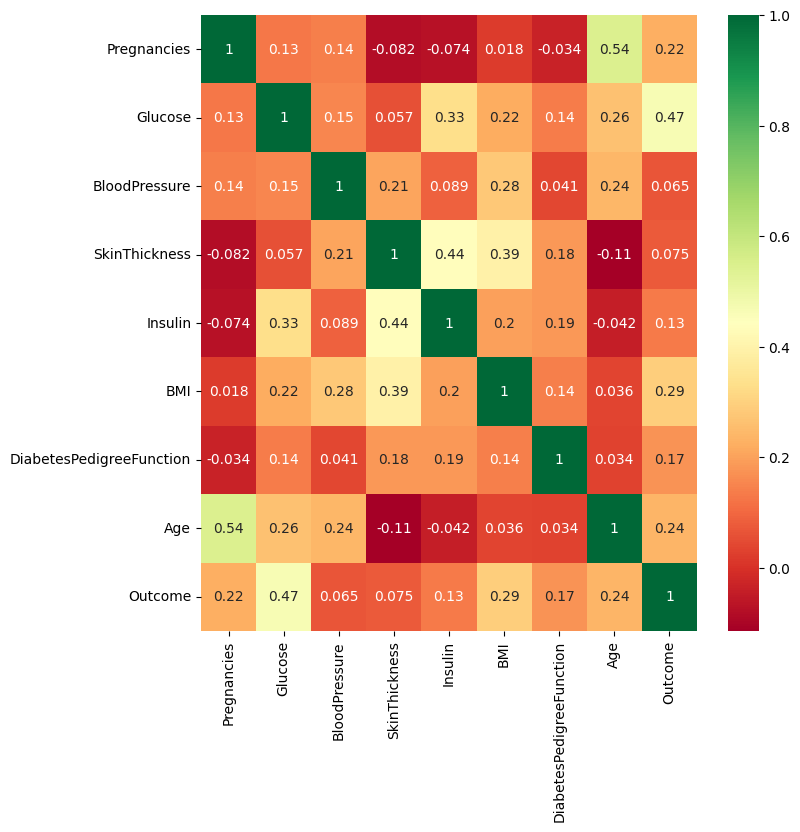

In [34]:
import seaborn as sns

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(8,8))

g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='RdYlGn')